# Summary of decoding scores

In [112]:
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns

from param import *

sns.set_theme(style="whitegrid", palette=sns.diverging_palette(12,30, s=100, l=50, sep=1,  n=7, center="dark"))
output_dir = ParamDir().OUTPUT_DIR
datalist = ParamDir().data_path_list


In [110]:
sns.diverging_palette(12,30, s=100, l=50, sep=1,  n=7, center="dark")

[(0.9384971249271132, 0.0, 0.025105478945338225),
 (0.6916562567205524, 0.04401965318596181, 0.06086819069432778),
 (0.43601112205591736, 0.08960938979796679, 0.09790647907610542),
 (0.15184947532720255, 0.13736831342592595, 0.13283456707671568),
 (0.35576112608072274, 0.2138351994095294, 0.08931407803665936),
 (0.5498693317449547, 0.28943366349615046, 0.04387458444546712),
 (0.7372925662024844, 0.3624285614225435, 0.0)]

## Overall MSE with `nthist = 1`

Text(0, 0.5, 'MSE(cm2)')

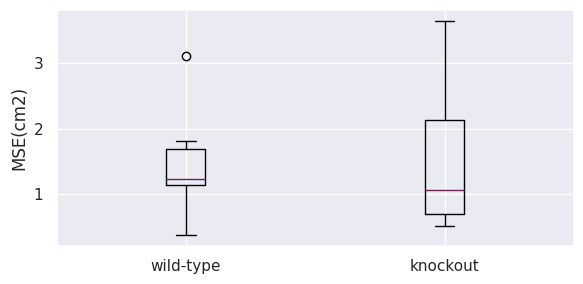

In [34]:

ko_mse_list = []
wt_mse_list = []
for data_dir in datalist:
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"
    if mouse_type == "knockout":
        with open(output_dir/(f"rr_spikes_past_coord_eval_{data_name}.pickle"),"rb") as f:
            eval_results_all = pickle.load(f)
        test_mse = [result["eval_test_scores"] for result in eval_results_all if (result["coord_axis"] == "x-axis") and (result["nthist"] == 1)][0]
        ko_mse_list .append(test_mse/25)
    if mouse_type == "wild-type":
        with open(output_dir/(f"rr_spikes_past_coord_eval_{data_name}.pickle"),"rb") as f:
            eval_results_all = pickle.load(f)
        test_mse = [result["eval_test_scores"] for result in eval_results_all if (result["coord_axis"] == "x-axis") and (result["nthist"] == 1)][0]
        wt_mse_list .append(test_mse/25)

fig, ax = plt.subplots(figsize=(6,3), tight_layout = True)
ax.boxplot([wt_mse_list, ko_mse_list])
ax.set_xticklabels(['wild-type', 'knockout'])
ax.set_ylabel("MSE(cm2)")

## With all nthist

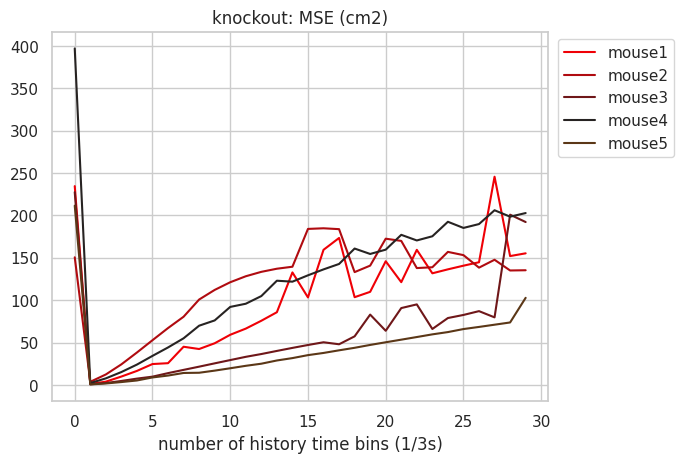

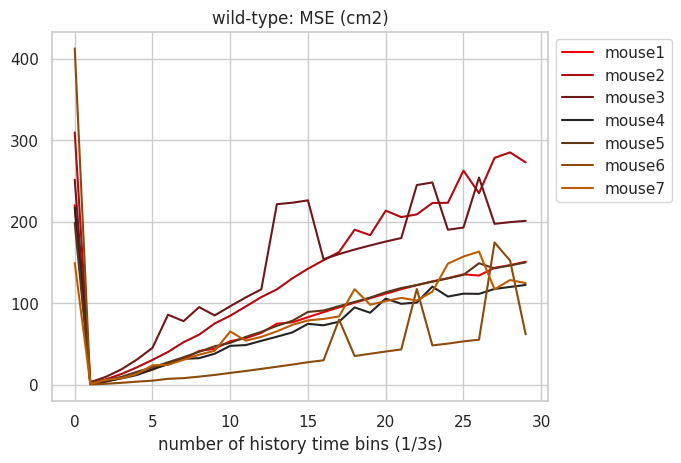

In [113]:
ko_mse_list = []
wt_mse_list = []
ko_id, wt_id= 0, 0
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
for data_dir in datalist:
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"
    if mouse_type == "knockout":
        ko_id +=1
        with open(output_dir/(f"rr_spikes_past_coord_eval_{data_name}.pickle"),"rb") as f:
            eval_results_all = pickle.load(f)
        xx, yy = [], []
        for result in eval_results_all:
            if (result["coord_axis"] == "x-axis"):
                yy.append(result["eval_test_scores"]/25)
                xx.append(result["nthist"])
        ax1.plot(xx, yy, label=f"mouse{ko_id}")
        ax1.set_title(f"{mouse_type}: MSE (cm2)")
        ax1.set_xlabel("number of history time bins (1/3s)")
        ax1.legend(bbox_to_anchor=(1.27, 1))

    if mouse_type == "wild-type":
        wt_id +=1
        with open(output_dir/(f"rr_spikes_past_coord_eval_{data_name}.pickle"),"rb") as f:
            eval_results_all = pickle.load(f)
        xx, yy = [], []
        for result in eval_results_all:
            if (result["coord_axis"] == "x-axis"):
                yy.append(result["eval_test_scores"]/25)
                xx.append(result["nthist"])
        ax2.plot(xx, yy, label=f"mouse{wt_id}")
        ax2.set_title(f"{mouse_type}: MSE (cm2)")
        ax2.set_xlabel("number of history time bins (1/3s)")
        ax2.legend(bbox_to_anchor=(1, 1))    